In [28]:
import processor
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
from scipy import fftpack

files = processor.parse_source(processor.sources[0])
filename = files[0][0]

rate, data = wavfile.read(filename)
rate
#timestep = 1/rate
timestep=1.0/(2 **16)
spectrum = fftpack.fft(data)
freq = fftfreq(data.size, d=timestep)


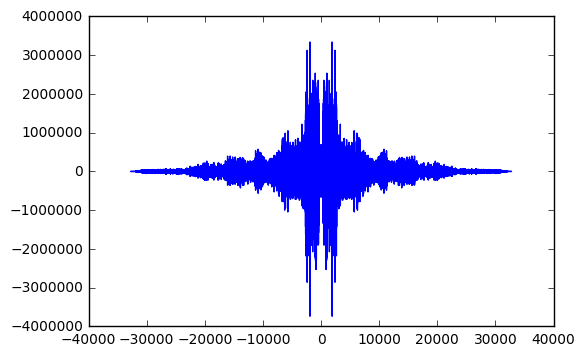

In [36]:
plt.figure()
plt.plot(freq, spectrum)
plt.show()

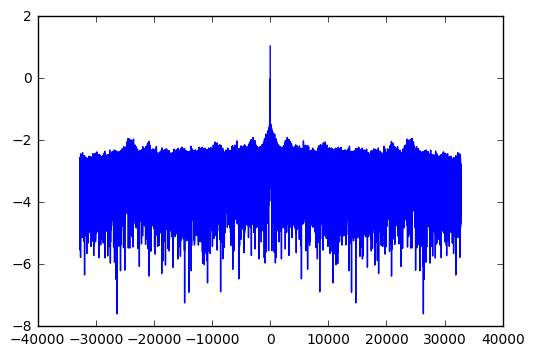

82000

In [38]:
cepstrum = processor.cepstrum(data)
plt.figure()
plt.plot(freq, np.log10(np.abs(cepstrum)))
plt.show()
cepstrum.size